Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



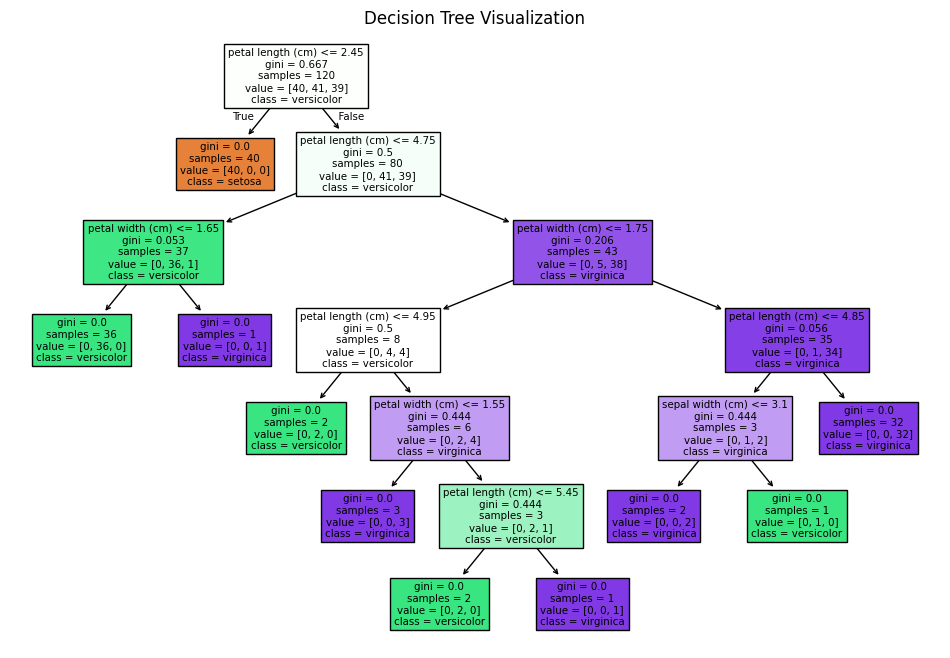

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the Iris Dataset
iris = load_iris()
X = iris.data  # Features (sepal and petal dimensions)
y = iris.target  # Target variable (species)

# Optional: Convert to DataFrame for better readability
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

# Step 2: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
)
plt.title("Decision Tree Visualization")
plt.show()

In [3]:
import math

# Data from the table
actual = [112, 113, 114, 115, 112, 121, 122, 114]
predicted = [113, 112, 116, 117, 110, 118, 121, 115]

# Number of data points
n = len(actual)

# Calculate MSE (Mean Squared Error)
mse = sum((a - p) ** 2 for a, p in zip(actual, predicted)) / n

# Calculate RMSE (Root Mean Squared Error)
rmse = math.sqrt(mse)

# Calculate Hybrid Error
hybrid_error = 0.3 * mse + 0.25 * rmse

# Calculate MAPE (Mean Absolute Percentage Error)
mape = sum(abs(a - p) / a for a, p in zip(actual, predicted)) / n * 100

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Hybrid Error: {hybrid_error:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 3.12
Root Mean Squared Error (RMSE): 1.77
Hybrid Error: 1.38
Mean Absolute Percentage Error (MAPE): 1.40%


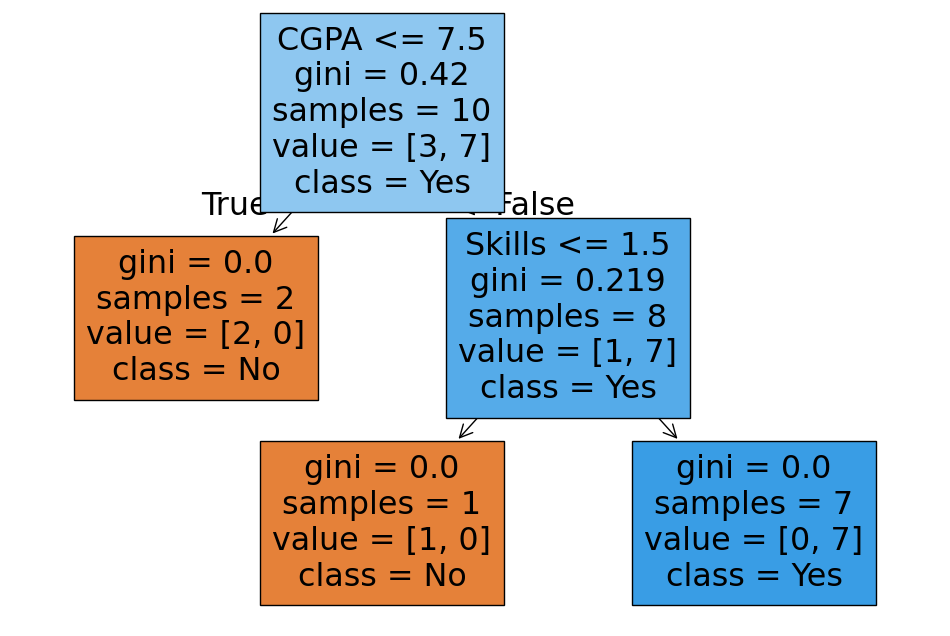

|--- CGPA <= 7.50
|   |--- class: 0
|--- CGPA >  7.50
|   |--- Skills <= 1.50
|   |   |--- class: 0
|   |--- Skills >  1.50
|   |   |--- class: 1



In [5]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

# Data from the table
data = [
    [9, 1, 3, 3],  # >=9, Yes, Very good, Good -> Yes
    [8, 0, 2, 2],  # >=8, No, Good, Moderate -> Yes
    [9, 0, 1, 1],  # >=9, No, Average, Poor -> No
    [7, 0, 1, 3],  # <8, No, Average, Good -> No
    [8, 1, 2, 2],  # >=8, Yes, Good, Moderate -> Yes
    [9, 1, 2, 2],  # >=9, Yes, Good, Moderate -> Yes
    [7, 1, 2, 1],  # <8, Yes, Good, Poor -> No
    [8, 0, 3, 3],  # >=8, No, Very good, Good -> Yes
    [8, 1, 2, 3],  # >=8, Yes, Good, Good -> Yes
    [8, 1, 1, 3],  # =8, Yes, Average, Good -> Yes
]

# Target labels (Job Offer: Yes -> 1, No -> 0)
labels = [1, 1, 0, 0, 1, 1, 0, 1, 1, 1]

# Feature names for better visualization
feature_names = ["CGPA", "Interactive", "Practical Knowledge", "Skills"]
class_names = ["No", "Yes"]

# Create and train the decision tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(data, labels)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# Display text representation of the decision tree
tree_rules = export_text(clf, feature_names=feature_names)
print(tree_rules)


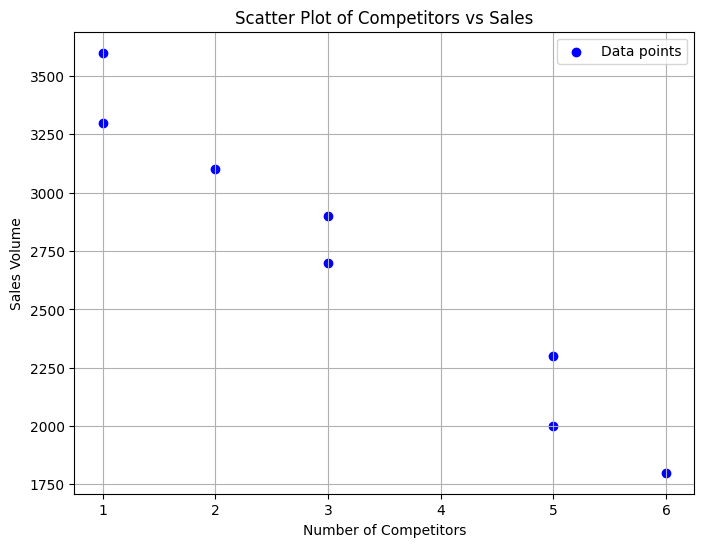

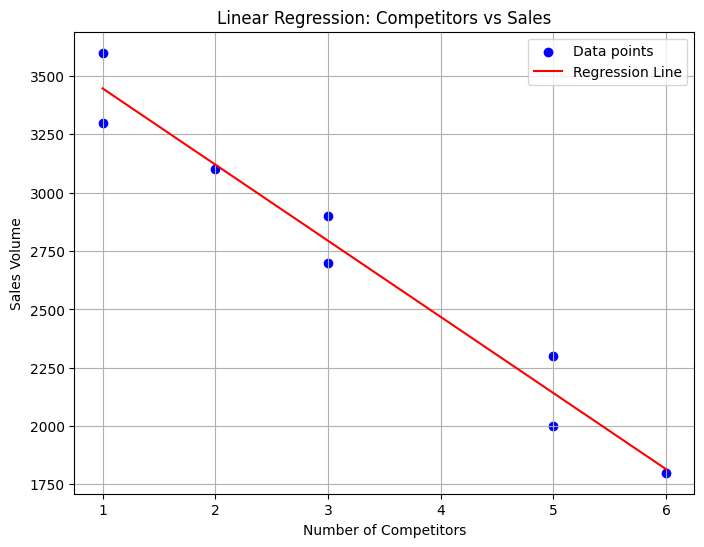

Linear Regression Equation: Sales = -326.47 * Competitors + 3773.53
Mean Squared Error: 13860.29
R-squared Value: 0.96


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data from the table
competitors = np.array([1, 1, 2, 3, 3, 5, 5, 6]).reshape(-1, 1)  # Independent variable
sales = np.array([3600, 3300, 3100, 2900, 2700, 2300, 2000, 1800])  # Dependent variable

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(competitors, sales, color="blue", label="Data points")
plt.title("Scatter Plot of Competitors vs Sales")
plt.xlabel("Number of Competitors")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid()
plt.show()

# Linear regression model
model = LinearRegression()
model.fit(competitors, sales)

# Predicted sales using the model
predicted_sales = model.predict(competitors)

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(competitors, sales, color="blue", label="Data points")
plt.plot(competitors, predicted_sales, color="red", label="Regression Line")
plt.title("Linear Regression: Competitors vs Sales")
plt.xlabel("Number of Competitors")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid()
plt.show()

# Model coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Performance metrics
mse = mean_squared_error(sales, predicted_sales)
r2 = r2_score(sales, predicted_sales)

print(f"Linear Regression Equation: Sales = {slope:.2f} * Competitors + {intercept:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Value: {r2:.2f}")
